In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
data.shape

(200, 4)

In [8]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


---

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

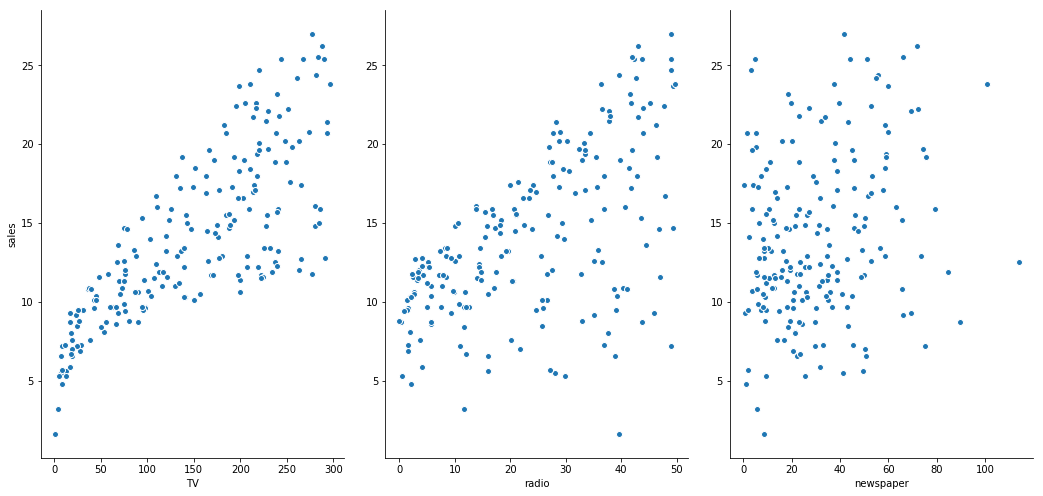

In [13]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

# Fit a linear model

- Preparing X and y using pandas:

1. scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
2. However, pandas is built on top of NumPy.
3. Thus, X can be a pandas DataFrame and y can be a pandas Series

In [14]:
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

In [18]:
print(X.head())
print(y.head())

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64


*** Validation Set Approach ***

- Splitting X and y into training and testing sets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

import linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

Instantiate

In [23]:
linreg = LinearRegression()

Fit the model to the training data (learn the coefficients)

In [24]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Print the intercept and coefficients

In [25]:
print(linreg.intercept_)

2.90794702082


In [26]:
print(linreg.coef_)

[ 0.0468431   0.17854434  0.00258619]


# Use statsmodels module

In [28]:
import statsmodels.api as sm
from scipy import stats

In [29]:
X = data[['TV','radio','newspaper']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           1.58e-96
Time:                        18:49:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

NOTES:

1. R-Squared/Adj. R-Squared: closer to 1, relationship between features and response
2. p > |t| is p-value: p=0.05 / p=0.01, if p-value < 0.05/0.01, we can conclude that there is a significant relation
3. What's the meaning of p-value of const(beta0)?

*** Even if we do not spend no money in TV, Radio, Newspaper, we still get the sales.
*** Because H0: Beta0 = 0  Beta0 is sales when X1=0, X2=0, X3=0

# Making predictions

In [30]:
# linreg = LinearRegression()
# linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

### Accuracy metrics for regression

Calculate MAE using scikit-learn

In [31]:
from sklearn import metrics

In [32]:
print(metrics.mean_absolute_error(y_test, y_pred))

1.04021540129


Calculate MSE using scikit-learn Mean Squared Error (MSE) is the mean of the squared errors:

In [33]:
print(metrics.mean_squared_error(y_test, y_pred))

1.99188555183


# Feature Selection

Let's remove Newspaper from the model and check the MSE!

In [34]:
X = data[['TV', 'radio']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
y_pred = linreg.predict(X_test)

In [38]:
# Compute the MSE of our predictions
print(metrics.mean_squared_error(y_test, y_pred))

1.92627604187


---

In [55]:
X = data[['TV', 'radio']]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [57]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
y_pred = linreg.predict(X_test)

In [59]:
print(metrics.mean_squared_error(y_test, y_pred))

2.14198202498


NOTES:
- If we do not use random_state, we will get different outcomes each time.
- It is so sensitive, and that is why we need to use Cross-validation

*** Advantages of cross-validation:

1. More accurate estimate of test error
2. More "efficient" use of data (every observation is used for both training and testing)
3. Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [60]:
from sklearn.cross_validation import cross_val_score

/Users/liamliu/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 10-fold cross-validation with all three features


In [61]:
lm = LinearRegression()
X = data[['TV', 'radio', 'newspaper']]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [64]:
# Calculate the avg MES
print(-scores.mean())
print(scores.std())

3.05996761812
1.83140704017


In [65]:
# Improved by using 2 features
lm = LinearRegression()
X = data[['TV', 'radio']]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)

[ 3.38264572  3.28736055  2.09185507  2.81784389  1.27311083  1.74391853
  8.0006111   2.07650936  3.03635301  2.4289835 ]


In [66]:
# Calculate the improved avg MES
print(-scores.mean())
print(scores.std())

3.01391915554
1.7841294524


---

*** How to determine which one has stronger relationship between sales?

### Using Cross Validation

In [67]:
lm = LinearRegression()
X = data[['TV']]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)
print(-scores.mean())
print(scores.std())

[  8.40789205  13.14771651  12.38497358   5.40560102   9.89370769
   9.56995819  11.39008331   9.53443623  15.76671309  12.32407115]
10.7825152813
2.72245896285


In [69]:
lm = LinearRegression()
X = data[['radio']]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)
print(-scores.mean())
print(scores.std())

[ 26.40177786  14.74726187  17.01847128  19.18124597   9.51664385
  12.92630464  41.30518664  16.76515256  13.35114099  15.4458471 ]
18.6659032767
8.65792423916


In [70]:
lm = LinearRegression()
X = data[['newspaper']]
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores)
print(-scores.mean())
print(scores.std())

[ 29.2896237   26.0354249   34.80364142  25.02428762  15.93610871
  23.80857647  35.69191133  21.27930274  18.44706421  30.40646397]
26.0722405076
6.22890797472


### Using R-Squared

In [71]:
import statsmodels.api as sm
from scipy import stats
X = data[['TV']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           1.47e-42
Time:                        19:33:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [72]:
X = data[['radio']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 23 Feb 2018   Prob (F-statistic):           4.35e-19
Time:                        19:34:06   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.0

In [73]:
X = data[['newspaper']]
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 23 Feb 2018   Prob (F-statistic):            0.00115
Time:                        19:34:19   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.0

### NOTES:
1. p-value is just to answer there is or not a relationship between feature and response.
2. we can not use coef to see which one has higher relation between response: like the coef of TV is 0.0458 but of radio is 0.1885, we could not conclude that radio has higher relationship.
3. Two-Way to conclude which feature has stronger relationship:
   ** Cross-Validation and R-Squared